### Dataset

In [2]:
# banknote.csv, petrol consumption.csv, iris.csv, wine-class.csv
# location: https://mitu.co.in/dataset

In [3]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# lOAD THE DATA

In [5]:
df = pd.read_csv('datasets/banknotes.csv')

In [7]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


### Separate The input and output variable

In [11]:
# input features 
x = df[['Variance','Skewness','Curtosis', 'Entropy']]  #or
#x = df.drop['Class', axis = 1]

#output features
y = df['Class']

In [12]:
x.describe

<bound method NDFrame.describe of       Variance  Skewness  Curtosis  Entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
1368  -1.38870  -4.87730    6.4774  0.34179
1369  -3.75030 -13.45860   17.5932 -2.77710
1370  -3.56370  -8.38270   12.3930 -1.28230
1371  -2.54190  -0.65804    2.6842  1.19520

[1372 rows x 4 columns]>

In [13]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

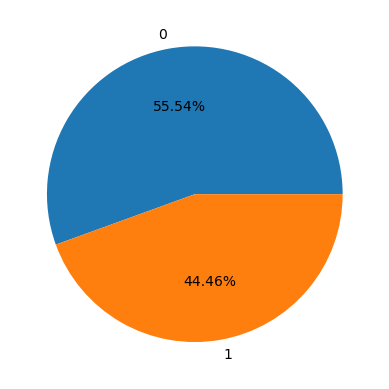

In [16]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


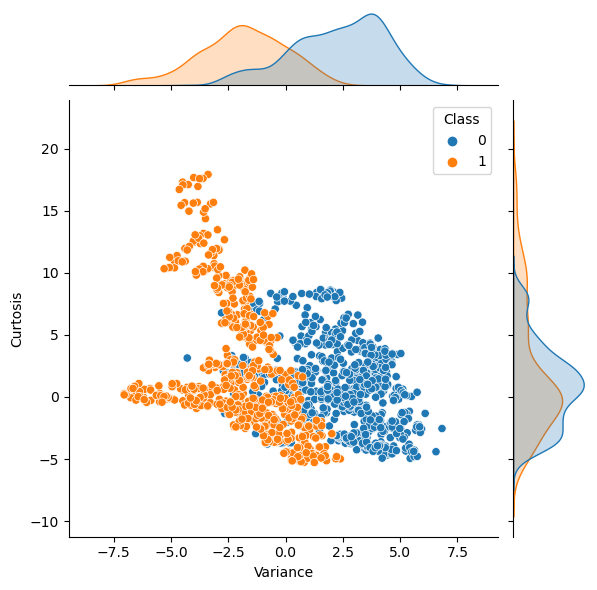

In [19]:
sns.jointplot(x='Variance', y='Curtosis', data=df, hue = 'Class')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


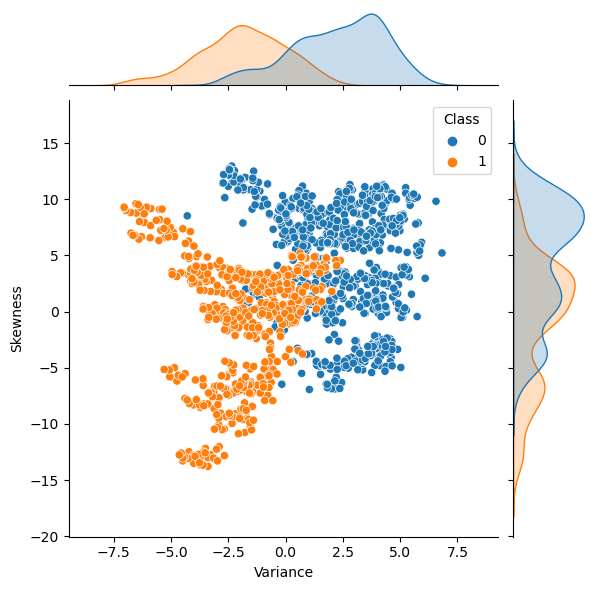

In [22]:
sns.jointplot(x='Variance', y='Skewness', data=df, hue = 'Class')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

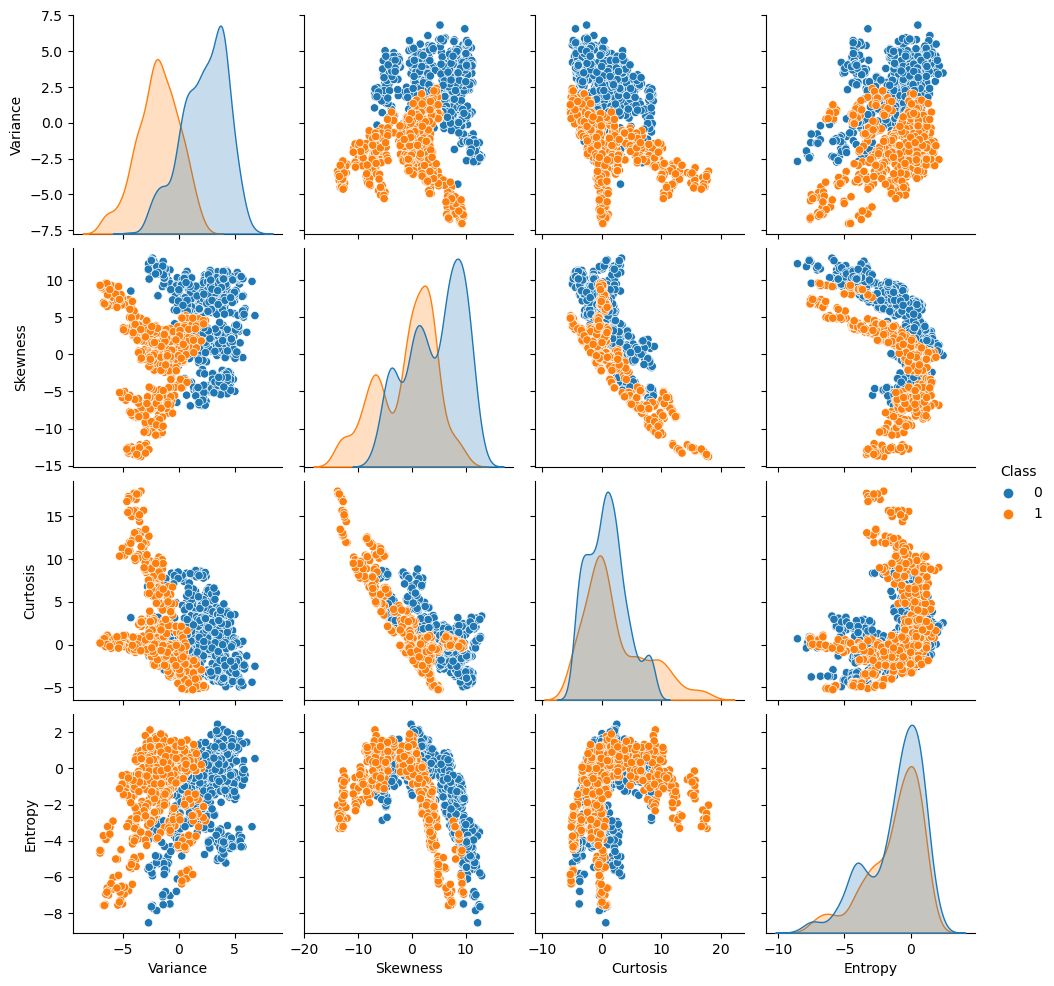

In [23]:
sns.pairplot(df, hue='Class')

## Cross validation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [26]:
x_train.shape

(1029, 4)

In [28]:
 x_test.shape

(343, 4)

# Build the model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf_tree = DecisionTreeClassifier(random_state=0)

In [32]:
#train the algorithm
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

# Performance evaluation

In [34]:
y_pred = clf_tree.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [37]:
print(confusion_matrix(y_test, y_pred))

[[191   4]
 [  3 145]]


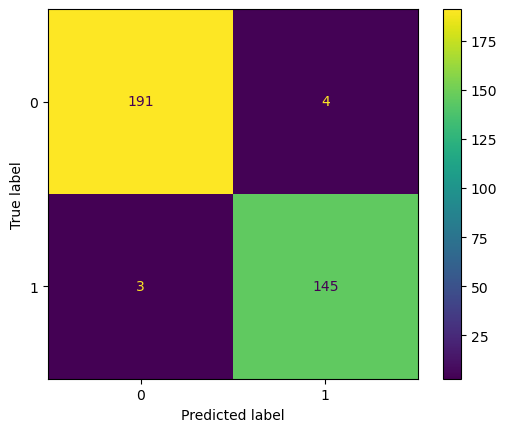

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



# visualize the tree

In [42]:
from sklearn.tree import plot_tree

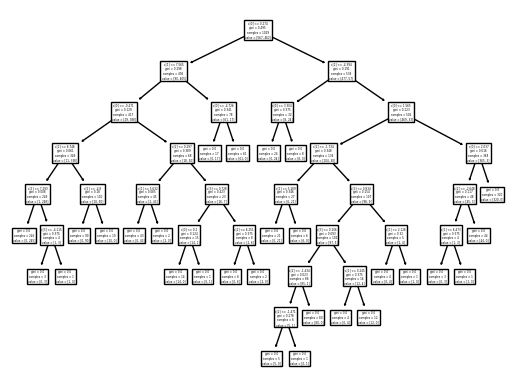

In [48]:

plot_tree(clf_tree);


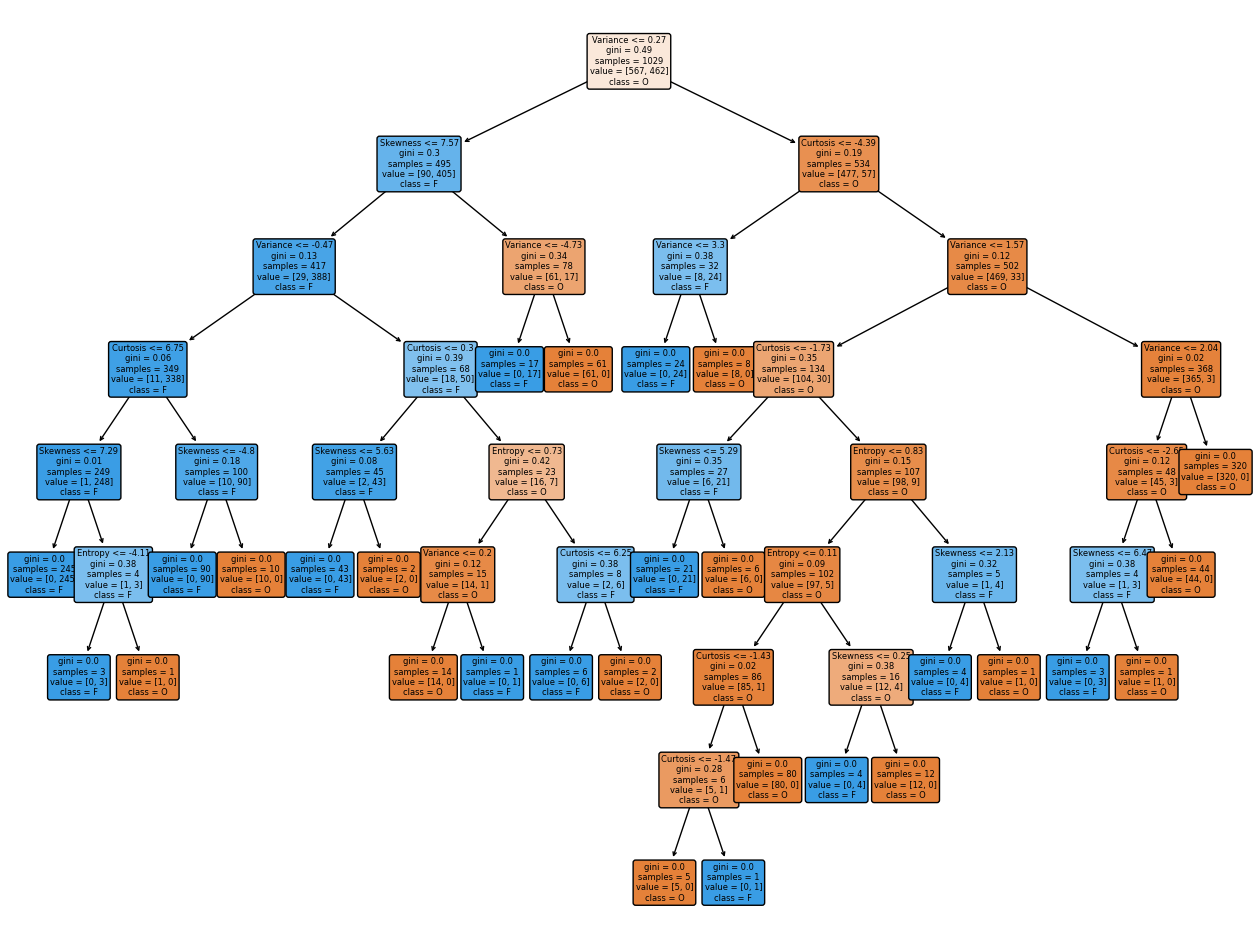

In [52]:
plt.figure(figsize=(16,12))
plot_tree(clf_tree, fontsize=6, feature_names=x.columns,
         filled= True, precision=2, class_names=['O','F'],
         rounded=True);
plt.savefig('tree.png') # save this img to the current directory

<BarContainer object of 4 artists>

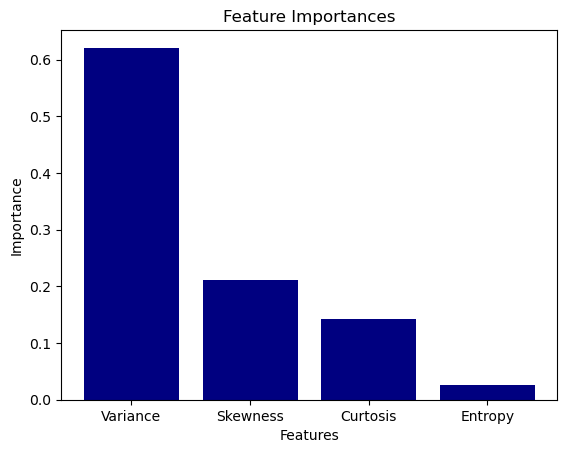

In [53]:
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')


plt.bar(x.columns, clf_tree.feature_importances_, color='navy')

# Prediction on unseen data

In [ ]:
v = float(input('Enter the Variance: '))
s = float(input('Enter the skewness: '))
c = float(input('Enter the curtosis: '))
e = float(input('Enter the entropy: '))
data = pd.DataFrame(data= [[v,s,c,e]], columns=x.columns)
pred = clf_tree.predict(data)

if pred[0] == 0:
    print('original Note')
else:
    print('Fake Note')



In [61]:
new = pd.DataFrame(data= [[3.4566,9.52280, -4.0112,-3.59440],
                          [0.40614, 1.34920, -1.4501, -0.55949],
                          [3.86600, -2.63830, 1.9242, 0.10645]],
                  columns=x.columns)


In [62]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.45660,9.5228,-4.0112,-3.59440
1,0.40614,1.3492,-1.4501,-0.55949
2,3.86600,-2.6383,1.9242,0.10645


In [68]:
clf_tree.predict(new)

array([0, 1, 0], dtype=int64)